In [2]:

import tensorflow
from keras.optimizers import SGD
from keras import regularizers

In [12]:
from __future__ import print_function
import keras
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from PIL import Image
import cv2
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 32, 32

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train = []
X_test = []
for i in range(len(x_train)):
    X_train.append(cv2.resize(x_train[i], (32,32)))

for i in range(len(x_test)):
    X_test.append(cv2.resize(x_test[i], (32,32)))

X_train = numpy.asarray(X_train) 
X_test = numpy.asarray(X_test)

In [13]:

X_train.shape

(60000, 32, 32)

In [14]:
if K.image_data_format() == 'channels_first':
    x_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    x_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#Convert to float and then normalize the images by dividing by 255(max value of a pixel)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 32, 32, 1)
60000 train samples
10000 test samples


In [15]:

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [16]:

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2))) 
model.add(Flatten()) 
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 256)         590080    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 256)        

In [17]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [18]:

history = model.fit(x_train, y_train, batch_size=32, validation_data=(x_test,y_test), epochs=10, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 428us/step - loss: 0.6632 - accuracy: 0.7610 - val_loss: 0.0802 - val_accuracy: 0.9741
Epoch 2/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.0616 - accuracy: 0.9823 - val_loss: 0.0452 - val_accuracy: 0.9863
Epoch 3/10
60000/60000 [==============================] - 25s 416us/step - loss: 0.0381 - accuracy: 0.9882 - val_loss: 0.0434 - val_accuracy: 0.9878
Epoch 4/10
60000/60000 [==============================] - 25s 421us/step - loss: 0.0282 - accuracy: 0.9917 - val_loss: 0.0287 - val_accuracy: 0.9909
Epoch 5/10
60000/60000 [==============================] - 26s 427us/step - loss: 0.0209 - accuracy: 0.9937 - val_loss: 0.0330 - val_accuracy: 0.9908
Epoch 6/10
60000/60000 [==============================] - 25s 417us/step - loss: 0.0159 - accuracy: 0.9951 - val_loss: 0.0252 - val_accuracy: 0.9931
Epoch 7/10
60000/60000 [==============================] 

In [10]:

score = model.evaluate(x_test, y_test, batch_size=32)
print(score)

10000/10000 [==============================] - 1s 122us/step
[2.3063053073883055, 0.11349999904632568]


# ALL MODELS

In [20]:
from torchvision.models.resnet import resnet18, ResNet, BasicBlock
from torchvision.datasets.mnist import MNIST

import numpy as np
import torchvision.transforms as transforms
import torch.utils.data as data
from torch.autograd import Variable

from torchvision.datasets.utils import makedir_exist_ok, download_url
from torch.utils.data import BatchSampler, DataLoader
from torchvision import transforms

ImportError: cannot import name 'makedir_exist_ok' from 'torchvision.datasets.utils' (/homes/es314/miniconda3/lib/python3.7/site-packages/torchvision/datasets/utils.py)

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


%matplotlib inline
np.random.seed(1)

In [4]:

# Loading the data (MNIST)
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images  # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

AttributeError: module 'tensorflow' has no attribute 'contrib'

y = 0


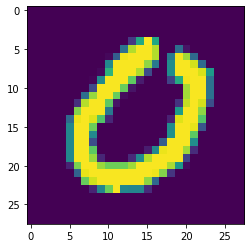

In [3]:
index = 7
plt.imshow(train_data[index].reshape(28, 28))
print ("y = " + str(np.squeeze(train_labels[index])))

In [4]:
print ("number of training examples = " + str(train_data.shape[0]))
print ("number of evaluation examples = " + str(eval_data.shape[0]))
print ("X_train shape: " + str(train_data.shape))
print ("Y_train shape: " + str(train_labels.shape))
print ("X_test shape: " + str(eval_data.shape))
print ("Y_test shape: " + str(eval_labels.shape))

number of training examples = 55000
number of evaluation examples = 10000
X_train shape: (55000, 784)
Y_train shape: (55000,)
X_test shape: (10000, 784)
Y_test shape: (10000,)


In [5]:
def cnn_model_fn(features, labels, mode):
    # Input Layer
    input_height, input_width = 28, 28
    input_channels = 1
    input_layer = tf.reshape(features["x"], [-1, input_height, input_width, input_channels])

    # Convolutional Layer #1 and Pooling Layer #1
    conv1_1 = tf.layers.conv2d(inputs=input_layer, filters=64, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    conv1_2 = tf.layers.conv2d(inputs=conv1_1, filters=64, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    pool1 = tf.layers.max_pooling2d(inputs=conv1_2, pool_size=[2, 2], strides=2, padding="same")
    
    # Convolutional Layer #2 and Pooling Layer #2
    conv2_1 = tf.layers.conv2d(inputs=pool1, filters=128, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    conv2_2 = tf.layers.conv2d(inputs=conv2_1, filters=128, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(inputs=conv2_2, pool_size=[2, 2], strides=2, padding="same")

    # Convolutional Layer #3 and Pooling Layer #3
    conv3_1 = tf.layers.conv2d(inputs=pool2, filters=256, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    conv3_2 = tf.layers.conv2d(inputs=conv3_1, filters=256, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    pool3 = tf.layers.max_pooling2d(inputs=conv3_2, pool_size=[2, 2], strides=2, padding="same")

    # Convolutional Layer #4 and Pooling Layer #4
    conv4_1 = tf.layers.conv2d(inputs=pool3, filters=512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    conv4_2 = tf.layers.conv2d(inputs=conv4_1, filters=512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    pool4 = tf.layers.max_pooling2d(inputs=conv4_2, pool_size=[2, 2], strides=2, padding="same")

    # Convolutional Layer #5 and Pooling Layer #5
    conv5_1 = tf.layers.conv2d(inputs=pool4, filters=512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    conv5_2 = tf.layers.conv2d(inputs=conv5_1, filters=512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    pool5 = tf.layers.max_pooling2d(inputs=conv5_2, pool_size=[2, 2], strides=2, padding="same")

    # FC Layers
    pool5_flat = tf.contrib.layers.flatten(pool5)
    FC1 = tf.layers.dense(inputs=pool5_flat, units=4096, activation=tf.nn.relu)
    FC2 = tf.layers.dense(inputs=FC1, units=4096, activation=tf.nn.relu)
    FC3 = tf.layers.dense(inputs=FC2, units=1000, activation=tf.nn.relu)

    """the training argument takes a boolean specifying whether or not the model is currently 
    being run in training mode; dropout will only be performed if training is true. here, 
    we check if the mode passed to our model function cnn_model_fn is train mode. """
    dropout = tf.layers.dropout(inputs=FC3, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    # Logits Layer or the output layer. which will return the raw values for our predictions.
    # Like FC layer, logits layer is another dense layer. We leave the activation function empty 
    # so we can apply the softmax
    logits = tf.layers.dense(inputs=dropout, units=10)
    
    # Then we make predictions based on raw output
    predictions = {
        # Generate predictions (for PREDICT and EVAL mode)
        # the predicted class for each example - a vlaue from 0-9
        "classes": tf.argmax(input=logits, axis=1),
        # to calculate the probablities for each target class we use the softmax
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }
    
    # so now our predictions are compiled in a dict object in python and using that we return an estimator object
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    
    '''Calculate Loss (for both TRAIN and EVAL modes): computes the softmax entropy loss. 
    This function both computes the softmax activation function as well as the resulting loss.'''
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

    # Configure the Training Options (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(loss=loss, global_step=tf.train.get_global_step())
        
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    # Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(labels=labels,
                                        predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(mode=mode,
                                      loss=loss,
                                      eval_metric_ops=eval_metric_ops)

In [6]:
mnist_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn,
                                          model_dir="/tmp/mnist_vgg13_model")

# Train the model
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": train_data},
                                                    y=train_labels,
                                                    batch_size=100,
                                                    num_epochs=100,
                                                    shuffle=True)
mnist_classifier.train(input_fn=train_input_fn,
                       steps=None,
                       hooks=None)

# Evaluate the model and print results
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": eval_data},
                                                   y=eval_labels,
                                                   num_epochs=1,
                                                   shuffle=False)
eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/mnist_vgg13_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f37ac0ccfd0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use th

UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node conv2d/Conv2D (defined at <ipython-input-5-d8ee4a722abb>:8) ]]
	 [[node sparse_softmax_cross_entropy_loss/value (defined at <ipython-input-5-d8ee4a722abb>:64) ]]

Caused by op 'conv2d/Conv2D', defined at:
  File "/homes/es314/miniconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/homes/es314/miniconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 583, in start
    self.io_loop.start()
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 153, in start
    self.asyncio_loop.run_forever()
  File "/homes/es314/miniconda3/lib/python3.7/asyncio/base_events.py", line 534, in run_forever
    self._run_once()
  File "/homes/es314/miniconda3/lib/python3.7/asyncio/base_events.py", line 1771, in _run_once
    handle._run()
  File "/homes/es314/miniconda3/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 377, in dispatch_queue
    yield self.process_one()
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tornado/gen.py", line 225, in wrapper
    runner = Runner(result, future, yielded)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tornado/gen.py", line 714, in __init__
    self.run()
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-50bbba388c7a>", line 12, in <module>
    hooks=None)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 358, in train
    loss = self._train_model(input_fn, hooks, saving_listeners)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 1124, in _train_model
    return self._train_model_default(input_fn, hooks, saving_listeners)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 1154, in _train_model_default
    features, labels, model_fn_lib.ModeKeys.TRAIN, self.config)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 1112, in _call_model_fn
    model_fn_results = self._model_fn(features=features, **kwargs)
  File "<ipython-input-5-d8ee4a722abb>", line 8, in cnn_model_fn
    conv1_1 = tf.layers.conv2d(inputs=input_layer, filters=64, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 324, in new_func
    return func(*args, **kwargs)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tensorflow/python/layers/convolutional.py", line 424, in conv2d
    return layer.apply(inputs)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py", line 1227, in apply
    return self.__call__(inputs, *args, **kwargs)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tensorflow/python/layers/base.py", line 530, in __call__
    outputs = super(Layer, self).__call__(inputs, *args, **kwargs)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py", line 554, in __call__
    outputs = self.call(inputs, *args, **kwargs)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/layers/convolutional.py", line 194, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_ops.py", line 966, in __call__
    return self.conv_op(inp, filter)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_ops.py", line 591, in __call__
    return self.call(inp, filter)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_ops.py", line 208, in __call__
    name=self.name)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 1026, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/homes/es314/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

UnknownError (see above for traceback): Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node conv2d/Conv2D (defined at <ipython-input-5-d8ee4a722abb>:8) ]]
	 [[node sparse_softmax_cross_entropy_loss/value (defined at <ipython-input-5-d8ee4a722abb>:64) ]]


In [7]:
tf.__version__

'1.13.1'